In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mvc = pd.read_csv("nypd_mvc_2018.csv")
pd.options.display.max_columns = None

In [3]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [4]:
NaN = mvc.isnull().sum()

In [5]:
missing = NaN*100/mvc.shape[0]
missing = round(missing,2)

In [6]:
miss_data = pd.DataFrame({"Null_values":NaN,"Null_values_%": missing}) 

In [7]:
miss_data

,Null_values,Null_values_%
unique_key,0,0.00
date,0,0.00
time,0,0.00
borough,20646,35.68
location,3885,6.71
on_street,13961,24.13
cross_street,29249,50.55
off_street,44093,76.20
pedestrians_injured,0,0.00
cyclist_injured,0,0.00


In [8]:
col_name = [col for col in mvc.columns if "injure" in col]

In [9]:
col_name

['pedestrians_injured', 'cyclist_injured', 'motorist_injured', 'total_injured']

In [10]:
injured = mvc[col_name].copy()

In [11]:
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [12]:
injured_manual_sum = injured[col_name[:-1]].sum(axis = 1)

In [13]:
injured_manual_sum

0        0
1        0
2        1
3        0
4        0
        ..
57859    3
57860    0
57861    1
57862    0
57863    0
Length: 57864, dtype: int64

In [14]:
mask = injured["total_injured"] != injured_manual_sum
mask

0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

In [15]:
injured["total_injured"].mask(mask,injured_manual_sum)
# mask variable mai true dhond kr total_injured mai injured_manual_sum wali
#value sy replace kr lyga

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
57859    3.0
57860    0.0
57861    1.0
57862    0.0
57863    0.0
Name: total_injured, Length: 57864, dtype: float64

In [19]:
injured[injured['total_injured'].isnull()]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
55699,0,0,1,NaN


In [20]:
col_name = [col for col in mvc.columns if "killed" in col]

In [21]:
col_name

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [22]:
killed = mvc[col_name].copy()

In [23]:
killed.head()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


In [24]:
killed_manual_sum = killed[col_name[:-1]].sum(axis = 1)

In [25]:
killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

In [26]:
mask = killed["total_killed"] != killed_manual_sum
mask

0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

In [30]:
killed["total_killed"] = killed["total_killed"].mask(mask,killed_manual_sum)
# mask variable mai true dhond kr total_injured mai injured_manual_sum wali
#value sy replace kr lyga

In [31]:
killed["total_killed"].isnull().sum()

0

In [32]:
killed[killed["total_killed"].isnull()]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed


In [36]:
fig = plt.figure(figsize = (18,15))



<Figure size 1296x1080 with 0 Axes>

In [46]:
mvc.isnull().sum() > 0

unique_key             False
date                   False
time                   False
borough                 True
location                True
on_street               True
cross_street            True
off_street              True
pedestrians_injured    False
cyclist_injured        False
motorist_injured       False
total_injured           True
pedestrians_killed     False
cyclist_killed         False
motorist_killed        False
total_killed            True
vehicle_1               True
vehicle_2               True
vehicle_3               True
vehicle_4               True
vehicle_5               True
cause_vehicle_1         True
cause_vehicle_2         True
cause_vehicle_3         True
cause_vehicle_4         True
cause_vehicle_5         True
dtype: bool

In [47]:
missing_cols = mvc.columns[mvc.isnull().sum() > 0]

In [52]:
def plot_null_matrix(df,figsize = (18,14)):
    fig = plt.figure(figsize = figsize)
    sns.heatmap(mvc.isnull(), cbar = False )
    plt.xticks(rotation = 90 , size = "x-large")
    plt.show()

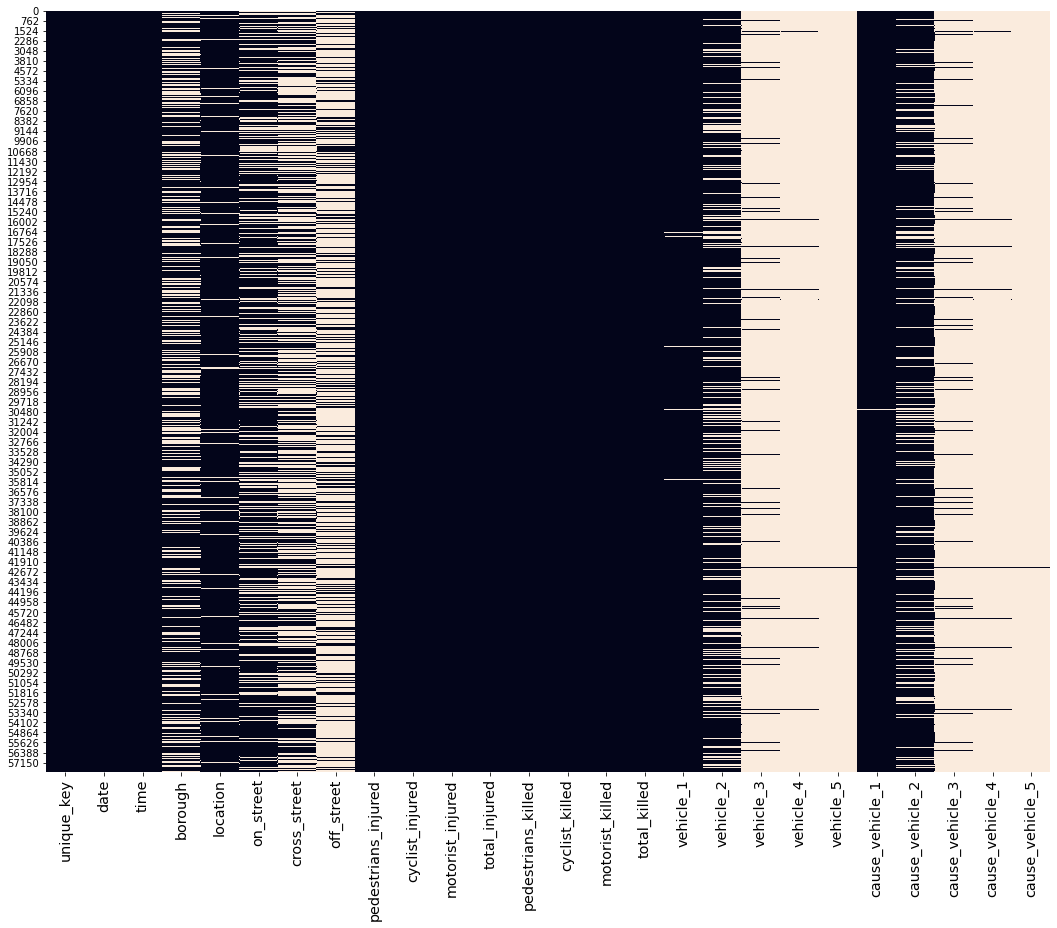

In [53]:
plot_null_matrix(missing_cols)